# Survival Rate Prediction

### Business Understanding

The Shrimp Aquaculture Survival Rate dataset is a comprehensive dataset used in the aquaculture industry, particularly for regression tasks. The dataset aims to understand the factors influencing the survival rates of shrimp in aquaculture ponds. By analyzing the relationship between various environmental, biological, and management-related attributes and the survival rates of shrimp, we can gain valuable insights into the determinants of successful shrimp farming. This understanding is crucial for aquaculture professionals, farm managers, and researchers to optimize shrimp farming practices and improve survival rates.

### Problem Statement

Given the Shrimp Aquaculture Survival Rate dataset, our objective is to build a machine learning regression model that can accurately predict the survival rate of shrimp based on the provided features. The primary metric for evaluating the model's performance will be the Mean Absolute Error (MAE). This metric is chosen because it provides a straightforward interpretation and a clear measure of prediction accuracy by averaging the absolute errors between predicted and actual values.

### Business Objective

The primary business objective is to develop a robust and accurate predictive model for the survival rate of shrimp in aquaculture ponds. This model will aid stakeholders in making data-driven decisions regarding pond management, feeding strategies, and environmental controls. By leveraging the predictive capabilities of machine learning, we aim to:

1. Enhance the accuracy of survival rate predictions.
2. Identify key factors influencing shrimp survival rates.
3. Enable better decision-making for shrimp farm management and operations.

### Business Metrics

To ensure the success of our predictive model and its alignment with business goals, we will focus on the following business metrics:

1. **Accuracy of Predictions**: The degree to which the predicted survival rates align with actual survival rates, helping stakeholders make informed decisions.
2. **Return on Investment (ROI)**: The financial gains achieved by stakeholders due to improved survival rates and optimized farming practices.
3. **Operational Efficiency**: The improvements in farm management practices and resource utilization driven by the insights from the predictive model.

### Machine Learning Metrics

To evaluate and optimize our machine learning model, we will focus on the following metrics:

1. **Mean Absolute Error (MAE)**: As our primary evaluation metric, MAE provides a clear measure of prediction accuracy by averaging the absolute errors between predicted and actual survival rates.

tolong ubah konteks diatas menjadi prediksi mengenai Average Body Weight of Shrimp (in grams) definisinya seperti ini

Average Body Weight (ABW)
Rerata berat udang. Nilai ABW diperoleh saat petambak melakukan sampling dan
panen. ABW dihitung dalam satuan gram dengan membandingkan total berat udang
sampel dibagi dengan jumlah udang yang dijadikan sampel. Selain sampling, informasi
estimasi ABW dapat diperoleh berdasarkan usia budidaya, pemberian pakan yang
dilakukan, dan estimasi dari program pakan yang digunakan.een predicted and actual survival rates.

In [330]:
# Import libraries for data preparation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Import libraries for saving and loading model and column files
import pickle
import copy

# Import train_test_split for splitting data
from sklearn.model_selection import train_test_split

In [331]:
# Read Data
df = pd.read_csv('Data/2_processed_data/survival_rate_prediction_data.csv')

In [332]:
# Sanity Check
df

,total_seed,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,pond_length,pond_width,pond_depth,size,...,nitrate,nitrite,alkalinity,hardness,calcium,magnesium,carbonate,bicarbonate,transparency,total_plankton_
0,331920,4030.00,0.0,2.00,110.0,35.0,65.00,62.00,1.0,83.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.327103,0.000000
1,357570,2000.00,0.0,1.25,120.0,20.0,50.00,40.00,1.4,72.48,...,0.011111,0.008200,17.044444,680.555556,119.855556,575.700000,0.000000,15.777778,68.916667,212305.555556
2,168275,1512.00,0.0,1.25,100.0,55.0,54.00,28.00,1.5,105.94,...,0.000000,0.030822,17.671233,126.602740,50.753425,140.136986,0.821918,16.849315,45.205479,66952.191781
3,188000,1225.00,0.0,1.25,100.0,55.0,35.00,35.00,1.2,93.00,...,0.000000,0.044667,9.813333,176.000000,29.333333,146.666667,0.160000,9.733333,0.000000,22466.666667
4,200128,803.84,0.0,1.25,120.0,55.0,32.00,32.00,1.5,89.24,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.421569,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839,226284,1400.00,0.0,1.25,120.0,55.0,40.00,35.00,1.2,87.00,...,0.000000,0.000000,13.072165,0.000000,0.000000,0.000000,0.000000,6.845361,58.314433,44536.082474
1840,300000,4999.90,0.0,1.25,88.0,55.0,70.71,70.71,1.5,18.40,...,0.000000,0.097528,23.820225,0.000000,0.000000,0.000000,0.000000,0.000000,41.853933,46118.573034
1841,100000,900.00,0.0,1.25,120.0,55.0,45.00,20.00,1.5,120.00,...,0.000000,0.004145,22.309091,771.454545,95.890909,300.436364,0.436364,16.418182,0.000000,49785.490909
1842,30716,86.00,0.0,1.25,120.0,20.0,10.71,8.03,1.0,280.00,...,0.125000,0.000208,5.416667,0.000000,3.437500,9.479167,1.166667,9.208333,0.000000,5416.666667


In [333]:
# Check Null Values
df.isnull().sum()

total_seed                0
area                      0
initial_age               0
limit_weight_per_area     0
target_cultivation_day    0
target_size               0
pond_length               0
pond_width                0
pond_depth                0
size                      0
weight                    0
total_harvested           0
survival_rate             0
cycle_duration_days       0
average_daily_gain        0
average_body_weight       0
feed_quantity_kg          0
feed_conversion_ratio     0
morning_temperature       0
evening_temperature       0
morning_do                0
evening_do                0
morning_salinity          0
evening_salinity          0
ammonia                   0
nitrate                   0
nitrite                   0
alkalinity                0
hardness                  0
calcium                   0
magnesium                 0
carbonate                 0
bicarbonate               0
transparency              0
total_plankton_           0
dtype: int64

In [334]:
# Check Duplicated Value
df.duplicated().sum()

0

In [335]:
# Check Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844 entries, 0 to 1843
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_seed              1844 non-null   int64  
 1   area                    1844 non-null   float64
 2   initial_age             1844 non-null   float64
 3   limit_weight_per_area   1844 non-null   float64
 4   target_cultivation_day  1844 non-null   float64
 5   target_size             1844 non-null   float64
 6   pond_length             1844 non-null   float64
 7   pond_width              1844 non-null   float64
 8   pond_depth              1844 non-null   float64
 9   size                    1844 non-null   float64
 10  weight                  1844 non-null   float64
 11  total_harvested         1844 non-null   float64
 12  survival_rate           1844 non-null   float64
 13  cycle_duration_days     1844 non-null   int64  
 14  average_daily_gain      1844 non-null   

## Data Definition

### Brief Narrative about the Shrimp Aquaculture Survival Rate Dataset:

The Shrimp Aquaculture Survival Rate dataset is a detailed dataset used in the field of machine learning for regression tasks, specifically to predict the survival rate of shrimp in aquaculture. This dataset captures various attributes related to the physical environment, water quality, and feed management in shrimp ponds, making it a valuable resource for analyzing the factors that influence shrimp survival rates.

The dataset includes 1844 entries and 35 columns, with attributes such as total seed, pond dimensions, water quality measurements, feed quantity, and other relevant factors. The target variable, `survival_rate`, represents the percentage of shrimp that survive until the end of the cultivation cycle. This dataset is widely used for educational purposes and practical applications in aquaculture management, demonstrating the application of linear regression, decision trees, and other machine learning algorithms to optimize shrimp farming practices.

### Data Definitions:

1. **total_seed**: Total number of shrimp seeds stocked in the pond. Data type: `int64`.
2. **area**: Area of the pond in square meters. Data type: `float64`.
3. **initial_age**: Initial age of the shrimp seeds in days. Data type: `float64`.
4. **limit_weight_per_area**: Limit weight of shrimp per unit area in kg/m². Data type: `float64`.
5. **target_cultivation_day**: Target number of cultivation days. Data type: `float64`.
6. **target_size**: Target size of shrimp at harvest in grams. Data type: `float64`.
7. **pond_length**: Length of the pond in meters. Data type: `float64`.
8. **pond_width**: Width of the pond in meters. Data type: `float64`.
9. **pond_depth**: Depth of the pond in meters. Data type: `float64`.
10. **size**: Average size of shrimp at stocking in grams. Data type: `float64`.
11. **weight**: Average weight of shrimp at stocking in grams. Data type: `float64`.
12. **total_harvested**: Total number of shrimp harvested. Data type: `float64`.
13. **survival_rate**: Survival rate of shrimp in percentage. Data type: `float64`.
14. **cycle_duration_days**: Duration of the cultivation cycle in days. Data type: `int64`.
15. **average_daily_gain**: Average daily weight gain of shrimp in grams. Data type: `float64`.
16. **average_body_weight**: Average body weight of shrimp at harvest in grams. Data type: `float64`.
17. **feed_quantity_kg**: Total feed quantity used during the cycle in kilograms. Data type: `float64`.
18. **feed_conversion_ratio**: Feed conversion ratio, a measure of the efficiency of feed usage. Data type: `float64`.
19. **morning_temperature**: Morning water temperature in degrees Celsius. Data type: `float64`.
20. **evening_temperature**: Evening water temperature in degrees Celsius. Data type: `float64`.
21. **morning_do**: Morning dissolved oxygen level in mg/L. Data type: `float64`.
22. **evening_do**: Evening dissolved oxygen level in mg/L. Data type: `float64`.
23. **morning_salinity**: Morning water salinity in parts per thousand (ppt). Data type: `float64`.
24. **evening_salinity**: Evening water salinity in parts per thousand (ppt). Data type: `float64`.
25. **ammonia**: Ammonia concentration in the water in mg/L. Data type: `float64`.
26. **nitrate**: Nitrate concentration in the water in mg/L. Data type: `float64`.
27. **nitrite**: Nitrite concentration in the water in mg/L. Data type: `float64`.
28. **alkalinity**: Water alkalinity in mg/L CaCO3. Data type: `float64`.
29. **hardness**: Water hardness in mg/L CaCO3. Data type: `float64`.
30. **calcium**: Calcium concentration in the water in mg/L. Data type: `float64`.
31. **magnesium**: Magnesium concentration in the water in mg/L. Data type: `float64`.
32. **carbonate**: Carbonate concentration in the water in mg/L. Data type: `float64`.
33. **bicarbonate**: Bicarbonate concentration in the water in mg/L. Data type: `float64`.
34. **transparency**: Water transparency in centimeters. Data type: `float64`.
35. **total_plankton_**: Total plankton concentration in the water in cells/mL. Data type: `float64`.

This dataset is pivotal for developing predictive models to enhance the efficiency and sustainability of shrimp aquaculture operations by identifying key factors that affect shrimp survival rates.

In [336]:
# Iterate through each column in the DataFrame
for column in df.columns:
    # Print the column name along with its minimum and maximum values
    print(f"{column}: min = {df[column].min()}, max = {df[column].max()}")

total_seed: min = 1272, max = 1800000
area: min = 1.02, max = 249998.0
initial_age: min = 0.0, max = 69.0
limit_weight_per_area: min = 0.6, max = 270.0
target_cultivation_day: min = 0.0, max = 348.0
target_size: min = 0.0, max = 120.0
pond_length: min = 3.0, max = 577.35
pond_width: min = 1.5, max = 433.01
pond_depth: min = 0.7, max = 300.0
size: min = 10.0, max = 1000.0
weight: min = 0.0, max = 11521.86
total_harvested: min = 0.0, max = 752840.0
survival_rate: min = 0.0, max = 99.46474713916574
cycle_duration_days: min = 19, max = 348
average_daily_gain: min = -0.2250000000000001, max = 2.066666666666667
average_body_weight: min = 0.02, max = 85.0
feed_quantity_kg: min = 3.0, max = 219525.5
feed_conversion_ratio: min = 0.0, max = inf
morning_temperature: min = 0.0, max = 543.305396226415
evening_temperature: min = 0.0, max = 75.968125
morning_do: min = -0.0665376344086021, max = 605.935925
evening_do: min = 0.0, max = 71.40357
morning_salinity: min = 0.0, max = 181.059320754717
evenin

In [337]:
# Viewing descriptive statistics using describe()
df.describe()

,total_seed,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,pond_length,pond_width,pond_depth,size,...,nitrate,nitrite,alkalinity,hardness,calcium,magnesium,carbonate,bicarbonate,transparency,total_plankton_
count,1.844000e+03,1844.000000,1844.000000,1844.000000,1844.000000,1844.000000,1844.000000,1844.000000,1844.000000,1844.000000,...,1844.000000,1844.000000,1844.000000,1844.000000,1844.000000,1844.000000,1844.000000,1844.000000,1844.000000,1.844000e+03
mean,2.312755e+05,1956.546372,0.405098,1.671838,114.105206,51.217462,44.179225,36.736876,4.533286,109.633991,...,0.294301,1.059649,12.145470,214.294393,31.277816,104.635494,0.679188,7.643328,21.294418,4.854437e+04
std,1.668845e+05,6134.900851,3.367232,7.891358,17.869388,10.358045,22.467105,17.417913,20.914900,63.580495,...,1.625180,17.461910,22.315192,712.476011,86.575328,274.404552,4.175689,17.812209,21.731054,1.516362e+05
min,1.272000e+03,1.020000,0.000000,0.600000,0.000000,0.000000,3.000000,1.500000,0.700000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.073812e+05,900.000000,0.000000,1.250000,100.000000,45.000000,32.000000,27.390000,1.100000,72.225000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,2.000000e+05,1483.890000,0.000000,1.250000,120.000000,55.000000,43.200000,35.000000,1.300000,99.475000,...,0.000000,0.000000,4.840734,0.000000,0.000000,0.000000,0.000000,0.000000,17.916667,0.000000e+00
75%,3.125000e+05,2381.030000,0.000000,1.250000,120.000000,55.000000,51.900000,45.000000,1.500000,132.050000,...,0.000000,0.020152,17.297517,163.591270,41.701299,117.466685,0.134576,12.193106,40.611358,3.638279e+04
max,1.800000e+06,249998.000000,69.000000,270.000000,348.000000,120.000000,577.350000,433.010000,300.000000,1000.000000,...,29.581395,527.815758,388.233208,22349.849462,1877.777778,4533.333333,127.500000,373.981132,80.000000,3.818013e+06


## Data Splitting

In [338]:
# Separating the feature variables (X) and the target variable (y)
X = df.drop(columns=["survival_rate", "feed_conversion_ratio", "total_harvested", "size", "weight"])
y = df["survival_rate"]

In [339]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=123)

In [340]:
# Sanity Check
X_train

,total_seed,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,pond_length,pond_width,pond_depth,cycle_duration_days,...,nitrate,nitrite,alkalinity,hardness,calcium,magnesium,carbonate,bicarbonate,transparency,total_plankton_
1373,200000,2660.00,0.0,1.25,100.0,55.0,95.00,28.00,1.50,66,...,0.000000,0.001409,2.909091,37.878788,9.090909,28.787879,0.363636,2.545455,0.000000,7121.212121
1186,325000,2500.00,0.0,1.25,120.0,55.0,50.00,50.00,1.20,110,...,0.000000,0.469855,23.772727,881.818182,65.818182,165.214545,0.036364,23.736364,41.636364,80590.909091
814,50000,1000.00,0.0,1.25,120.0,45.0,36.51,27.39,1.30,109,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1244,383358,2560.00,1.0,1.25,120.0,55.0,50.60,50.60,1.20,93,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000
410,400000,1500.00,0.0,1.25,100.0,55.0,44.72,33.54,1.50,91,...,0.002895,55.283026,8.671053,209.013158,64.105263,200.157895,0.815789,9.592105,48.766447,25907.368421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,436424,1962.50,0.0,1.25,120.0,50.0,50.00,50.00,1.20,85,...,0.000000,0.015541,23.581081,0.000000,67.554054,135.810811,0.000000,0.000000,9.162162,0.000000
1346,72314,600.00,0.0,1.25,120.0,45.0,28.28,21.21,1.25,120,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1406,115000,1000.00,0.0,1.20,110.0,30.0,37.67,28.25,1.10,87,...,0.000000,0.013000,25.129630,932.907407,13.555556,42.018519,1.333333,3.111111,50.092593,740.740741
1389,84000,1064.18,0.0,1.25,130.0,55.0,37.67,28.25,1.10,58,...,0.000000,0.012754,12.114754,409.245902,111.606557,381.360656,1.180328,10.934426,49.139344,41516.557377


In [341]:
# Sanity Check
X_test

,total_seed,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,pond_length,pond_width,pond_depth,cycle_duration_days,...,nitrate,nitrite,alkalinity,hardness,calcium,magnesium,carbonate,bicarbonate,transparency,total_plankton_
12,100000,1050.0,0.0,2.00,120.0,45.0,35.00,30.00,1.0,108,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.150000,0.000000
533,123816,1600.0,0.0,1.25,100.0,55.0,40.00,40.00,1.0,54,...,0.000000,0.000741,19.740000,51.206897,34.293103,79.844828,27.034483,10.385690,13.431034,28103.452586
1227,325000,2500.0,0.0,1.25,100.0,55.0,50.00,50.00,1.2,74,...,0.000000,0.004786,19.957143,1015.328571,178.400000,836.957143,1.014286,18.885714,36.285714,83294.214286
319,340200,4030.0,0.0,2.00,111.0,35.0,65.00,62.00,1.0,111,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.486486,0.000000
1386,600000,1023.0,4.0,1.25,120.0,55.0,31.00,33.00,1.5,110,...,0.000000,1.657895,13.484211,0.000000,0.000000,0.000000,0.000000,2.294737,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,50000,256.0,0.0,2.25,99.0,45.0,16.00,16.00,1.2,55,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.528302,0.000000
938,183464,2319.0,0.0,1.25,100.0,55.0,54.59,40.94,1.2,72,...,0.000000,0.010519,21.123457,831.481481,64.962963,186.271605,2.308642,18.790123,66.851852,95679.012346
0,331920,4030.0,0.0,2.00,110.0,35.0,65.00,62.00,1.0,107,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.327103,0.000000
637,102609,1300.0,0.0,1.25,100.0,55.0,40.00,40.00,1.0,68,...,0.142857,0.002614,23.919143,63.171429,40.821429,94.592857,0.000000,7.802000,20.507143,5071.428571


In [342]:
# Sanity Check
y_train

1373     4.900000
1186    19.004649
814     31.968000
1244    15.696442
410      8.169065
          ...    
1122    16.126004
1346    11.566225
1406    23.742783
1389     3.214286
1534    50.639919
Name: survival_rate, Length: 1475, dtype: float64

In [343]:
# Sanity Check
y_test

12      15.150000
533     21.358540
1227    61.641009
319     53.438859
1386    36.666667
          ...    
988     97.680000
938     63.616243
0       43.397957
637     28.402772
798     10.000000
Name: survival_rate, Length: 369, dtype: float64

In [344]:
# create x_train_copy
X_train_copy = X_train.copy()

In [345]:
# create x_test_copy
X_test_copy = X_test.copy()

## Simple EDA

In [346]:
# Combine X_train and y_train for EDA purposes
train_set = pd.merge(X_train, y_train, left_index=True, right_index=True)

# Sanity check the data
train_set

,total_seed,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,pond_length,pond_width,pond_depth,cycle_duration_days,...,nitrite,alkalinity,hardness,calcium,magnesium,carbonate,bicarbonate,transparency,total_plankton_,survival_rate
1373,200000,2660.00,0.0,1.25,100.0,55.0,95.00,28.00,1.50,66,...,0.001409,2.909091,37.878788,9.090909,28.787879,0.363636,2.545455,0.000000,7121.212121,4.900000
1186,325000,2500.00,0.0,1.25,120.0,55.0,50.00,50.00,1.20,110,...,0.469855,23.772727,881.818182,65.818182,165.214545,0.036364,23.736364,41.636364,80590.909091,19.004649
814,50000,1000.00,0.0,1.25,120.0,45.0,36.51,27.39,1.30,109,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.968000
1244,383358,2560.00,1.0,1.25,120.0,55.0,50.60,50.60,1.20,93,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,15.696442
410,400000,1500.00,0.0,1.25,100.0,55.0,44.72,33.54,1.50,91,...,55.283026,8.671053,209.013158,64.105263,200.157895,0.815789,9.592105,48.766447,25907.368421,8.169065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,436424,1962.50,0.0,1.25,120.0,50.0,50.00,50.00,1.20,85,...,0.015541,23.581081,0.000000,67.554054,135.810811,0.000000,0.000000,9.162162,0.000000,16.126004
1346,72314,600.00,0.0,1.25,120.0,45.0,28.28,21.21,1.25,120,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.566225
1406,115000,1000.00,0.0,1.20,110.0,30.0,37.67,28.25,1.10,87,...,0.013000,25.129630,932.907407,13.555556,42.018519,1.333333,3.111111,50.092593,740.740741,23.742783
1389,84000,1064.18,0.0,1.25,130.0,55.0,37.67,28.25,1.10,58,...,0.012754,12.114754,409.245902,111.606557,381.360656,1.180328,10.934426,49.139344,41516.557377,3.214286


C:\Users\hp\AppData\Local\Temp\ipykernel_10296\2196530832.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train_set[col], shade=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_10296\2196530832.py:30: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_val = stats.mode(train_set[col])[0]
C:\Users\hp\AppData\Local\Temp\ipykernel_10296\2196530832.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update you

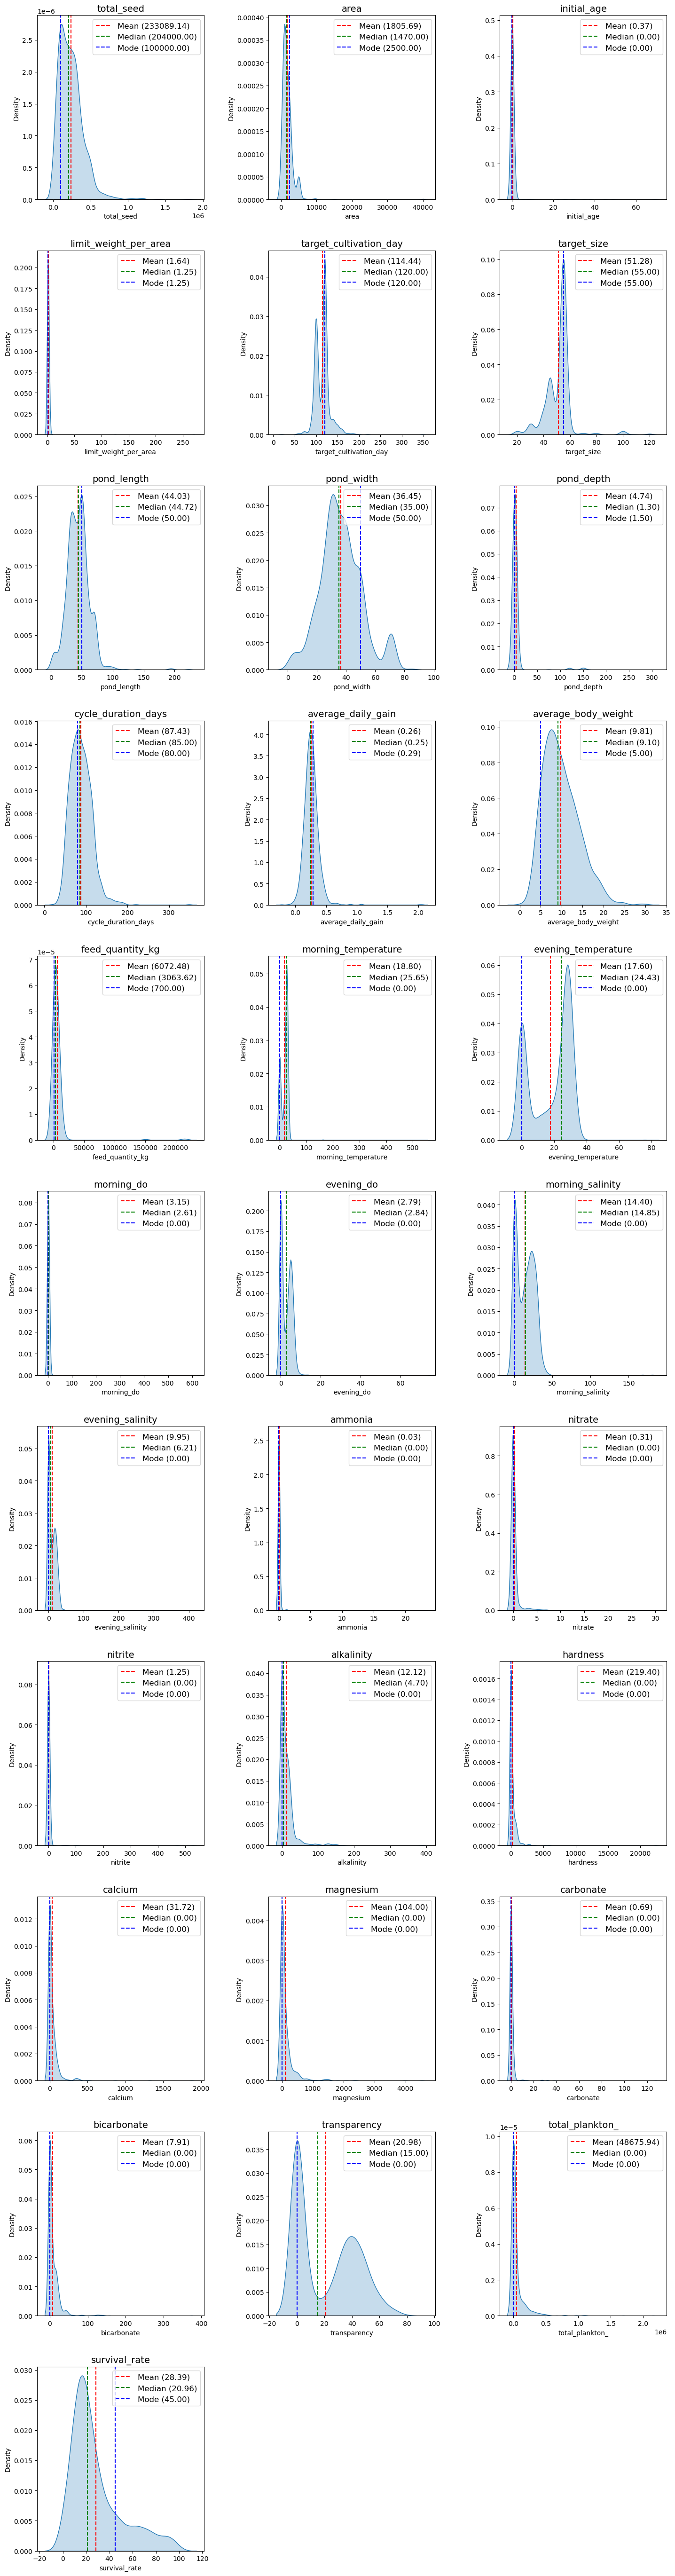

In [347]:
# Setting the number of rows and columns for subplots
num_rows = 12 
num_cols = 3 

# Calculating the total number of subplots
total_subplots = num_rows * num_cols

# Adjusting aspect ratio based on number of rows and columns
fig_width = 15 
fig_height = 5 * num_rows  

# Adjusting the figure size with aspect ratio
plt.figure(figsize=(fig_width, fig_height))

# Initializing the subplot index
subplot_index = 1

# Looping through each column to visualize the data distribution
for col in train_set.columns:
    if train_set[col].dtype != 'object':
        # Creating a subplot
        plt.subplot(num_rows, num_cols, subplot_index)

        # Using kdeplot to visualize the distribution
        ax = sns.kdeplot(train_set[col], shade=True)

        # Calculating mean, median, and mode
        mean_val = train_set[col].mean()
        median_val = train_set[col].median()
        mode_val = stats.mode(train_set[col])[0]

        # Adding lines for mean, median, and mode
        ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean ({mean_val:.2f})')
        ax.axvline(median_val, color='green', linestyle='--', label=f'Median ({median_val:.2f})')
        ax.axvline(mode_val, color='blue', linestyle='--', label=f'Mode ({mode_val[0]:.2f})')

        # Setting the title
        ax.set_title(col, fontsize=14)

        # Adding a legend
        plt.legend(fontsize=12)

        # Incrementing the subplot index
        subplot_index += 1

        # Stop creating subplots if already reached the total number of subplots
        if subplot_index > total_subplots:
            break

# Adjusting the layout of subplots for better readability
plt.tight_layout(pad=3.0)

# Showing the plot
plt.show()


In [348]:
# List of provided features
features = [
       'total_seed', 'area', 'initial_age', 'limit_weight_per_area',
       'target_cultivation_day', 'target_size', 'pond_length', 'pond_width',
       'pond_depth', 'cycle_duration_days', 'average_daily_gain',
       'average_body_weight', 'feed_quantity_kg', 'morning_temperature',
       'evening_temperature', 'morning_do', 'evening_do', 'morning_salinity',
       'evening_salinity', 'ammonia', 'nitrate', 'nitrite', 'alkalinity',
       'hardness', 'calcium', 'magnesium', 'carbonate', 'bicarbonate',
       'transparency', 'total_plankton_', 'survival_rate'
]

# Calculate the correlation matrix using the Spearman method
correlation_matrix = train_set[features].corr(method='spearman')

# Flatten the correlation matrix and convert it to a DataFrame
correlation_df = correlation_matrix.unstack().reset_index()

# Rename columns
correlation_df.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Remove duplicate pairs and self-correlations
correlation_df = correlation_df[correlation_df['Feature 1'] != correlation_df['Feature 2']]

# Remove duplicates (reverse correlations) by keeping one side of the pair
correlation_df['abs_correlation'] = correlation_df['Correlation'].abs()
correlation_df = correlation_df.drop_duplicates(subset=['Feature 1', 'abs_correlation'])

# Sort the DataFrame by correlation values in descending order
correlation_df_sorted = correlation_df.sort_values(by='Correlation', ascending=False)

# Display the sorted correlation DataFrame
print(correlation_df_sorted[['Feature 1', 'Feature 2', 'Correlation']])


                  Feature 1               Feature 2  Correlation
769                 calcium               magnesium     0.993671
799               magnesium                 calcium     0.993671
798               magnesium                hardness     0.885802
738                hardness               magnesium     0.885802
737                hardness                 calcium     0.881018
..                      ...                     ...          ...
148  target_cultivation_day                 calcium    -0.240464
149  target_cultivation_day               magnesium    -0.246973
779               magnesium  target_cultivation_day    -0.246973
147  target_cultivation_day                hardness    -0.259470
717                hardness  target_cultivation_day    -0.259470

[930 rows x 3 columns]


In [349]:
# Sanity Check
correlation_df_sorted

,Feature 1,Feature 2,Correlation,abs_correlation
769,calcium,magnesium,0.993671,0.993671
799,magnesium,calcium,0.993671,0.993671
798,magnesium,hardness,0.885802,0.885802
738,hardness,magnesium,0.885802,0.885802
737,hardness,calcium,0.881018,0.881018
...,...,...,...,...
148,target_cultivation_day,calcium,-0.240464,0.240464
149,target_cultivation_day,magnesium,-0.246973,0.246973
779,magnesium,target_cultivation_day,-0.246973,0.246973
147,target_cultivation_day,hardness,-0.259470,0.259470


In [350]:
# Filter the correlation dataframe for rows where 'Feature 1' or 'Feature 2' is 'survival_rate'
survival_rate_correlations = correlation_df_sorted[(correlation_df_sorted['Feature 1'] == 'survival_rate') | (correlation_df_sorted['Feature 2'] == 'survival_rate')]

# Display the filtered dataframe
survival_rate_correlations.head(30)

,Feature 1,Feature 2,Correlation,abs_correlation
681,nitrite,survival_rate,0.101322,0.101322
951,survival_rate,nitrite,0.101322,0.101322
712,alkalinity,survival_rate,0.098953,0.098953
952,survival_rate,alkalinity,0.098953,0.098953
950,survival_rate,nitrate,0.053457,0.053457
650,nitrate,survival_rate,0.053457,0.053457
932,survival_rate,initial_age,0.030721,0.030721
92,initial_age,survival_rate,0.030721,0.030721
946,survival_rate,evening_do,0.029155,0.029155
526,evening_do,survival_rate,0.029155,0.029155


## Data Preprocessing

In [351]:
# Import necessary libraries
import os
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [352]:
import os
import pickle
from sklearn.preprocessing import RobustScaler

# Columns to scale
columns_to_scale = [
       'total_seed', 'area', 'initial_age', 'limit_weight_per_area',
       'target_cultivation_day', 'target_size', 'pond_length', 'pond_width',
       'pond_depth', 'cycle_duration_days', 'average_daily_gain',
       'average_body_weight', 'feed_quantity_kg', 'morning_temperature',
       'evening_temperature', 'morning_do', 'evening_do', 'morning_salinity',
       'evening_salinity', 'ammonia', 'nitrate', 'nitrite', 'alkalinity',
       'hardness', 'calcium', 'magnesium', 'carbonate', 'bicarbonate',
       'transparency', 'total_plankton_'
]

def fit_scaler(train_data):
    """
    Fit a RobustScaler to the training data.

    Parameters:
    train_data (DataFrame): The training data.

    Returns:
    scaler (RobustScaler): The fitted scaler object.
    """
    scaler = RobustScaler()
    scaler.fit(train_data.loc[:, columns_to_scale])
    # Save scaler
    with open('model/survival_rate_scaler_first.pkl', 'wb') as f:
        pickle.dump(scaler, f)
    return scaler

def load_scaler(folder_path):
    """
    Load a saved scaler object from a folder.

    Parameters:
    folder_path (str): The path to the folder containing the saved scaler.

    Returns:
    scaler (RobustScaler): The loaded scaler object.
    """
    # Load scaler
    file_path = os.path.join(folder_path, 'survival_rate_scaler_first.pkl')
    with open(file_path, 'rb') as f:
        scaler = pickle.load(f)
    return scaler

def transform_data(data, scaler):
    """
    Scale the data using a given scaler.

    Parameters:
    data (DataFrame): The data to be scaled.
    scaler (RobustScaler): The scaler object to use for scaling.

    Returns:
    scaled_data (DataFrame): The scaled data.
    """
    scaled_data = scaler.transform(data.loc[:, columns_to_scale])
    data.loc[:, columns_to_scale] = scaled_data
    return data

In [353]:
# Fit a RobustScaler to the training data
scaler = fit_scaler(X_train_copy)

In [354]:
# Load the scaler from the specified folder path
scaling = load_scaler('model/')

In [355]:
# Transform the training and testing data using the loaded scaler
X_train_scaled = transform_data(X_train_copy, scaling)
X_test_scaled = transform_data(X_test_copy, scaling)

In [356]:
# Sanity check
X_train_scaled

,total_seed,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,pond_length,pond_width,pond_depth,cycle_duration_days,...,nitrate,nitrite,alkalinity,hardness,calcium,magnesium,carbonate,bicarbonate,transparency,total_plankton_
1373,-0.019512,0.793333,0.0,0.00,-1.0,0.0,2.397711,-0.397501,0.500,-0.558824,...,0.000000,0.073480,-0.104713,0.230550,0.218482,0.240157,2.556768,0.210595,-0.371293,0.187206
1186,0.590244,0.686667,0.0,0.00,0.0,0.0,0.251788,0.851789,-0.250,0.735294,...,0.000000,24.501642,1.117233,5.367208,1.581809,1.378267,0.255677,1.963797,0.659327,2.118610
814,-0.751220,-0.313333,0.0,0.00,0.0,-1.0,-0.391512,-0.432141,0.000,0.705882,...,0.000000,0.000000,-0.275093,0.000000,0.000000,0.000000,0.000000,0.000000,-0.371293,0.000000
1244,0.874917,0.726667,1.0,0.00,0.0,0.0,0.280401,0.885860,-0.250,0.235294,...,0.000000,0.000000,-0.275093,0.000000,0.000000,0.000000,0.000000,0.000000,0.717834,0.000000
410,0.956098,0.020000,0.0,0.00,-1.0,0.0,0.000000,-0.082907,0.500,0.176471,...,0.002895,2882.860053,0.232755,1.272164,1.540643,1.669775,5.735906,0.793590,0.835817,0.681065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,1.133776,0.328333,0.0,0.00,0.0,-0.5,0.251788,0.851789,-0.250,0.000000,...,0.000000,0.810397,1.106009,0.000000,1.623528,1.132973,0.000000,0.000000,-0.144503,0.000000
1346,-0.642371,-0.580000,0.0,0.00,0.0,-1.0,-0.783977,-0.783078,-0.125,1.029412,...,0.000000,0.000000,-0.275093,0.000000,0.000000,0.000000,0.000000,0.000000,-0.371293,0.000000
1406,-0.434146,-0.313333,0.0,-0.05,-0.5,-2.5,-0.336195,-0.383305,-0.500,0.058824,...,0.000000,0.677915,1.196704,5.678163,0.325781,0.350531,9.374815,0.257394,0.868643,0.019473
1389,-0.585366,-0.270547,0.0,0.00,0.5,0.0,-0.336195,-0.383305,-0.500,-0.794118,...,0.000000,0.665092,0.434446,2.490885,2.682242,3.181420,8.299016,0.904645,0.845048,1.091406


In [357]:
# Sanity Check
X_test_scaled

,total_seed,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,pond_length,pond_width,pond_depth,cycle_duration_days,...,nitrate,nitrite,alkalinity,hardness,calcium,magnesium,carbonate,bicarbonate,transparency,total_plankton_
12,-0.507317,-0.280000,0.0,0.75,0.00,-1.0,-0.463519,-0.283930,-0.75,0.676471,...,0.000000,0.000000,-0.275093,0.000000,0.000000,0.000000,0.000000,0.000000,0.597782,0.000000
533,-0.391141,0.086667,0.0,0.00,-1.00,0.0,-0.225083,0.283930,-0.75,-0.911765,...,0.000000,0.038661,0.881043,0.311672,0.824167,0.666088,190.082452,0.859246,-0.038836,0.738796
1227,0.590244,0.686667,0.0,0.00,-1.00,0.0,0.251788,0.851789,-0.25,-0.323529,...,0.000000,0.249562,0.893761,6.179822,4.287490,6.982136,7.131556,1.562485,0.526883,2.189676
319,0.664390,1.706667,0.0,0.75,-0.45,-2.0,0.967096,1.533220,-0.75,0.764706,...,0.000000,0.000000,-0.275093,0.000000,0.000000,0.000000,0.000000,0.000000,0.630864,0.000000
1386,1.931707,-0.298000,4.0,0.00,0.00,0.0,-0.654268,-0.113572,0.50,0.735294,...,0.000000,86.454719,0.514653,0.000000,0.000000,0.000000,0.000000,0.189852,-0.371293,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,-0.751220,-0.809333,0.0,1.00,-1.05,-1.0,-1.369576,-1.078932,-0.25,-0.882353,...,0.000000,0.000000,-0.275093,0.000000,0.000000,0.000000,0.000000,0.000000,0.607146,0.000000
938,-0.100176,0.566000,0.0,0.00,-1.00,0.0,0.470672,0.337308,-0.25,-0.382353,...,0.000000,0.548512,0.962070,5.060832,1.561256,1.553931,16.232318,1.554576,1.283483,2.515253
0,0.624000,1.706667,0.0,0.75,-0.50,-2.0,0.967096,1.533220,-0.75,0.647059,...,0.000000,0.000000,-0.275093,0.000000,0.000000,0.000000,0.000000,0.000000,0.750684,0.000000
637,-0.494590,-0.113333,0.0,0.00,-1.00,0.0,-0.225083,0.283930,-0.75,-0.500000,...,0.142857,0.136328,1.125808,0.384494,0.981062,0.789121,0.000000,0.645488,0.136318,0.133320


## Feature Selection

In [358]:
# Copy X_train_scaled
X_train_clean = X_train_scaled.copy()

In [359]:
# Copy X_test_clean
X_test_clean = X_test_scaled.copy()

In [360]:
# Import necessary libraries for data preparation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for data splitting
from sklearn.model_selection import train_test_split

# Import library for data scaling
from sklearn.preprocessing import StandardScaler

# Import library for calculating mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error

# Import libraries for model creation
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

In [361]:
# Initialize RandomForestRegressor model with specified parameters
random_forest = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=123)

# Initialize RFE with RandomForestRegressor as estimator and desired number of features
rfe = RFE(estimator=random_forest, n_features_to_select=24)

# Train RFE on the training data
rfe.fit(X_train_clean, y_train)

# Get the mask of selected features
selected_features = rfe.support_

# Get the ranking of each feature
feature_ranking = rfe.ranking_

# Selected features
selected_feature_names = X_train_clean.columns[selected_features]

print(f"Selected features: {selected_feature_names}")

# Transform the training and testing data using the selected features
X_train_rfe = rfe.transform(X_train_clean)
X_test_rfe = rfe.transform(X_test_clean)

# Fit the RandomForestRegressor model on the transformed training data
random_forest.fit(X_train_rfe, y_train)

# Make predictions on the training data
y_pred_train = random_forest.predict(X_train_rfe)

# Make predictions on the testing data
y_pred_test = random_forest.predict(X_test_rfe)

# Calculate Mean Absolute Error (MAE) for training and testing data
mae_train_rf = mean_absolute_error(y_train, y_pred_train)
mae_test_rf = mean_absolute_error(y_test, y_pred_test)

# Print the MAE results
print(f"MAE Train : {mae_train_rf:.4f}")
print(f"MAE Test  : {mae_test_rf:.4f}")

Selected features: Index(['total_seed', 'area', 'target_cultivation_day', 'target_size',
       'pond_length', 'pond_width', 'pond_depth', 'cycle_duration_days',
       'average_daily_gain', 'average_body_weight', 'feed_quantity_kg',
       'morning_temperature', 'evening_temperature', 'morning_do',
       'evening_do', 'morning_salinity', 'evening_salinity', 'nitrite',
       'alkalinity', 'calcium', 'magnesium', 'bicarbonate', 'transparency',
       'total_plankton_'],
      dtype='object')
MAE Train : 7.5625
MAE Test  : 12.2045


                   Feature  Importance
7      cycle_duration_days    0.162625
10        feed_quantity_kg    0.139165
18              alkalinity    0.085025
9      average_body_weight    0.067298
5               pond_width    0.057991
1                     area    0.051748
15        morning_salinity    0.044705
0               total_seed    0.043749
12     evening_temperature    0.034104
11     morning_temperature    0.032039
8       average_daily_gain    0.028483
22            transparency    0.026346
3              target_size    0.025253
17                 nitrite    0.024453
13              morning_do    0.024322
6               pond_depth    0.022774
2   target_cultivation_day    0.020656
4              pond_length    0.020295
21             bicarbonate    0.019130
14              evening_do    0.015382
16        evening_salinity    0.015195
20               magnesium    0.015019
19                 calcium    0.013446
23         total_plankton_    0.010797


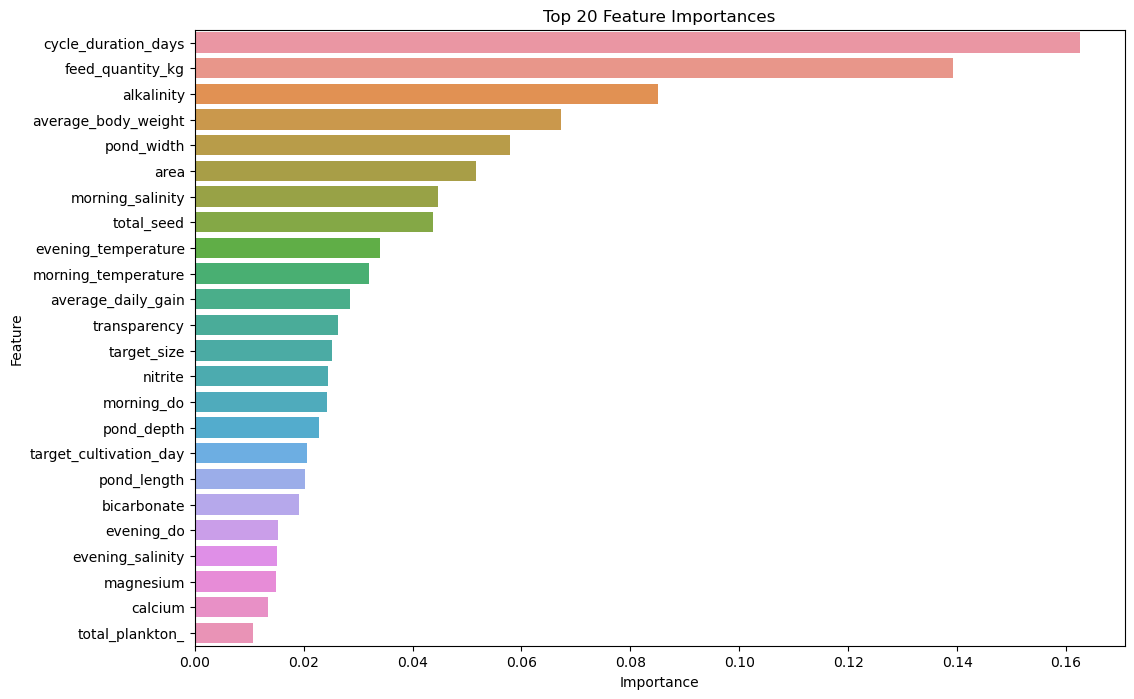

In [362]:
# Assume random_forest has been trained and selected_feature_names is available
# Get feature importance from the model
feature_importances = random_forest.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Importance': feature_importances
})

# Sort the feature importance from most to least important
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 20 important features
top_20_feature_importance_df = feature_importance_df.head(24)
print(top_20_feature_importance_df)

# Visualize the top 20 important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_20_feature_importance_df)
plt.title('Top 20 Feature Importances')
plt.show()

In [363]:
# Using the variable feature_importances and RFE
feature_importances = top_20_feature_importance_df['Feature'].unique()
RFE = selected_feature_names

# Convert lists to sets for easier set operations
set_feature_importances = set(feature_importances)
set_RFE = set(RFE)

# Features that are in 'feature_importances' but not in 'RFE'
only_in_feature_importances = set_feature_importances - set_RFE

# Features that are in 'RFE' but not in 'feature_importances'
only_in_RFE = set_RFE - set_feature_importances

# Features that are in both sets
in_both = set_feature_importances & set_RFE

print("Features only in 'feature_importances':", only_in_feature_importances)
print("Features only in 'RFE':", only_in_RFE)
print("Features in both sets:", in_both)

Features only in 'feature_importances': set()
Features only in 'RFE': set()
Features in both sets: {'target_cultivation_day', 'nitrite', 'evening_temperature', 'evening_salinity', 'alkalinity', 'calcium', 'target_size', 'cycle_duration_days', 'pond_depth', 'area', 'magnesium', 'average_body_weight', 'average_daily_gain', 'pond_width', 'morning_salinity', 'feed_quantity_kg', 'total_seed', 'morning_do', 'bicarbonate', 'morning_temperature', 'pond_length', 'total_plankton_', 'transparency', 'evening_do'}


## Training Data

In [364]:
# Sanity Check (selected feature)
feature_importance_df.Feature.unique()

array(['cycle_duration_days', 'feed_quantity_kg', 'alkalinity',
       'average_body_weight', 'pond_width', 'area', 'morning_salinity',
       'total_seed', 'evening_temperature', 'morning_temperature',
       'average_daily_gain', 'transparency', 'target_size', 'nitrite',
       'morning_do', 'pond_depth', 'target_cultivation_day',
       'pond_length', 'bicarbonate', 'evening_do', 'evening_salinity',
       'magnesium', 'calcium', 'total_plankton_'], dtype=object)

In [365]:
# Sanity Check
X_train

,total_seed,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,pond_length,pond_width,pond_depth,cycle_duration_days,...,nitrate,nitrite,alkalinity,hardness,calcium,magnesium,carbonate,bicarbonate,transparency,total_plankton_
1373,200000,2660.00,0.0,1.25,100.0,55.0,95.00,28.00,1.50,66,...,0.000000,0.001409,2.909091,37.878788,9.090909,28.787879,0.363636,2.545455,0.000000,7121.212121
1186,325000,2500.00,0.0,1.25,120.0,55.0,50.00,50.00,1.20,110,...,0.000000,0.469855,23.772727,881.818182,65.818182,165.214545,0.036364,23.736364,41.636364,80590.909091
814,50000,1000.00,0.0,1.25,120.0,45.0,36.51,27.39,1.30,109,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1244,383358,2560.00,1.0,1.25,120.0,55.0,50.60,50.60,1.20,93,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000
410,400000,1500.00,0.0,1.25,100.0,55.0,44.72,33.54,1.50,91,...,0.002895,55.283026,8.671053,209.013158,64.105263,200.157895,0.815789,9.592105,48.766447,25907.368421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,436424,1962.50,0.0,1.25,120.0,50.0,50.00,50.00,1.20,85,...,0.000000,0.015541,23.581081,0.000000,67.554054,135.810811,0.000000,0.000000,9.162162,0.000000
1346,72314,600.00,0.0,1.25,120.0,45.0,28.28,21.21,1.25,120,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1406,115000,1000.00,0.0,1.20,110.0,30.0,37.67,28.25,1.10,87,...,0.000000,0.013000,25.129630,932.907407,13.555556,42.018519,1.333333,3.111111,50.092593,740.740741
1389,84000,1064.18,0.0,1.25,130.0,55.0,37.67,28.25,1.10,58,...,0.000000,0.012754,12.114754,409.245902,111.606557,381.360656,1.180328,10.934426,49.139344,41516.557377


In [366]:
# Sanity Check
X_test

,total_seed,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,pond_length,pond_width,pond_depth,cycle_duration_days,...,nitrate,nitrite,alkalinity,hardness,calcium,magnesium,carbonate,bicarbonate,transparency,total_plankton_
12,100000,1050.0,0.0,2.00,120.0,45.0,35.00,30.00,1.0,108,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.150000,0.000000
533,123816,1600.0,0.0,1.25,100.0,55.0,40.00,40.00,1.0,54,...,0.000000,0.000741,19.740000,51.206897,34.293103,79.844828,27.034483,10.385690,13.431034,28103.452586
1227,325000,2500.0,0.0,1.25,100.0,55.0,50.00,50.00,1.2,74,...,0.000000,0.004786,19.957143,1015.328571,178.400000,836.957143,1.014286,18.885714,36.285714,83294.214286
319,340200,4030.0,0.0,2.00,111.0,35.0,65.00,62.00,1.0,111,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.486486,0.000000
1386,600000,1023.0,4.0,1.25,120.0,55.0,31.00,33.00,1.5,110,...,0.000000,1.657895,13.484211,0.000000,0.000000,0.000000,0.000000,2.294737,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,50000,256.0,0.0,2.25,99.0,45.0,16.00,16.00,1.2,55,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.528302,0.000000
938,183464,2319.0,0.0,1.25,100.0,55.0,54.59,40.94,1.2,72,...,0.000000,0.010519,21.123457,831.481481,64.962963,186.271605,2.308642,18.790123,66.851852,95679.012346
0,331920,4030.0,0.0,2.00,110.0,35.0,65.00,62.00,1.0,107,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.327103,0.000000
637,102609,1300.0,0.0,1.25,100.0,55.0,40.00,40.00,1.0,68,...,0.142857,0.002614,23.919143,63.171429,40.821429,94.592857,0.000000,7.802000,20.507143,5071.428571


In [367]:
import os
import pickle
from sklearn.preprocessing import RobustScaler

# Columns to scale
columns_to_scale = ['target_cultivation_day', 'nitrite', 'evening_temperature', 'evening_salinity', 'alkalinity', 'calcium', 
                    'target_size', 'cycle_duration_days', 'pond_depth', 'area', 'magnesium', 'average_body_weight', 'average_daily_gain', 
                    'pond_width', 'morning_salinity', 'feed_quantity_kg', 'total_seed', 'morning_do', 
                    'bicarbonate', 'morning_temperature', 'pond_length', 'total_plankton_', 'transparency', 'evening_do']

def fit_scaler(train_data):
    """
    Fit a RobustScaler to the training data.

    Parameters:
    train_data (DataFrame): The training data.

    Returns:
    scaler (RobustScaler): The fitted scaler object.
    """
    scaler = RobustScaler()
    scaler.fit(train_data.loc[:, columns_to_scale])
    # Save scaler
    with open('model/survival_rate_scaler.pkl', 'wb') as f:
        pickle.dump(scaler, f)
    return scaler

def load_scaler(folder_path):
    """
    Load a saved scaler object from a folder.

    Parameters:
    folder_path (str): The path to the folder containing the saved scaler.

    Returns:
    scaler (RobustScaler): The loaded scaler object.
    """
    # Load scaler
    file_path = os.path.join(folder_path, 'survival_rate_scaler.pkl')
    with open(file_path, 'rb') as f:
        scaler = pickle.load(f)
    return scaler

def transform_data(data, scaler):
    """
    Scale the data using a given scaler.

    Parameters:
    data (DataFrame): The data to be scaled.
    scaler (RobustScaler): The scaler object to use for scaling.

    Returns:
    scaled_data (DataFrame): The scaled data.
    """
    scaled_data = scaler.transform(data.loc[:, columns_to_scale])
    data.loc[:, columns_to_scale] = scaled_data
    return data

In [368]:
X_train_feature_importances = X_train[['target_cultivation_day', 'nitrite', 'evening_temperature', 'evening_salinity', 'alkalinity', 
                                      'calcium', 'target_size', 'cycle_duration_days', 'pond_depth', 'area', 'magnesium', 
                                      'average_body_weight', 'average_daily_gain', 'pond_width', 'morning_salinity', 'feed_quantity_kg', 
                                      'total_seed', 'morning_do', 'bicarbonate', 'morning_temperature', 'pond_length', 
                                      'total_plankton_', 'transparency', 'evening_do']].copy()
X_test_feature_importances = X_test[['target_cultivation_day', 'nitrite', 'evening_temperature', 'evening_salinity', 'alkalinity', 
                                      'calcium', 'target_size', 'cycle_duration_days', 'pond_depth', 'area', 'magnesium', 
                                      'average_body_weight', 'average_daily_gain', 'pond_width', 'morning_salinity', 'feed_quantity_kg', 
                                      'total_seed', 'morning_do', 'bicarbonate', 'morning_temperature', 'pond_length', 
                                      'total_plankton_', 'transparency', 'evening_do']].copy()

In [369]:
# Sorted Columns
X_train_feature_importances = X_train_feature_importances[sorted(X_train_feature_importances.columns)]

In [370]:
# Sorted Columns
X_test_feature_importances = X_test_feature_importances[sorted(X_test_feature_importances.columns)]

In [371]:
# Fit a RobustScaler to the training data
scaler = fit_scaler(X_train_feature_importances)

In [372]:
# Load the scaler from the specified folder path
scaling = load_scaler('model/')

In [373]:
# Transform the training and testing data using the loaded scaler
X_train_clean = transform_data(X_train_feature_importances, scaling)
X_test_clean = transform_data(X_test_feature_importances, scaling)

In [374]:
X_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1475 entries, 1373 to 1534
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   alkalinity              1475 non-null   float64
 1   area                    1475 non-null   float64
 2   average_body_weight     1475 non-null   float64
 3   average_daily_gain      1475 non-null   float64
 4   bicarbonate             1475 non-null   float64
 5   calcium                 1475 non-null   float64
 6   cycle_duration_days     1475 non-null   float64
 7   evening_do              1475 non-null   float64
 8   evening_salinity        1475 non-null   float64
 9   evening_temperature     1475 non-null   float64
 10  feed_quantity_kg        1475 non-null   float64
 11  magnesium               1475 non-null   float64
 12  morning_do              1475 non-null   float64
 13  morning_salinity        1475 non-null   float64
 14  morning_temperature     1475 non-null

## Baseline

In [375]:
# Baseline
y_baseline_predict = y_train.mean()
y_baseline_predict

28.385280852147943

In [376]:
# Viewing Mean Absolute Error for the baseline Model
mae_train_baseline = mean_absolute_error(y_train, y_baseline_predict * np.ones(len(y_train)))
mae_test_baseline = mean_absolute_error(y_test, y_baseline_predict * np.ones(len(y_test)))

# Viewing mae train baseline and mae test baseline
mae_train_baseline, mae_test_baseline

(17.121148619953185, 17.298073242988362)

## Linear Regression

In [377]:
# Build LinearRegression
lin_reg = LinearRegression()

In [378]:
#Fitting Model LinearRegression
lin_reg.fit(X_train_clean, y_train)

LinearRegression()

In [379]:
# Predict
y_pred_train = lin_reg.predict(X_train_clean)
y_pred_test = lin_reg.predict(X_test_clean)

# MAE
mae_train_lg = mean_absolute_error(y_train, y_pred_train)
mae_test_lg = mean_absolute_error(y_test, y_pred_test)

# Viewing the results of mae train lg and mae test lg
mae_train_lg, mae_test_lg

(14.437036624155066, 16.881257775765373)

## Dectree

In [380]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Initialize the DecisionTreeRegressor model with specified parameters
dec_tree = DecisionTreeRegressor(max_depth=10, random_state=123)

# Train the model on the training data
dec_tree.fit(X_train_clean, y_train)

# Make predictions on the training data
y_pred_train = dec_tree.predict(X_train_clean)

# Make predictions on the test data
y_pred_test = dec_tree.predict(X_test_clean)

# Calculate the Mean Absolute Error (MAE) for the training and test data
mae_train_dt = mean_absolute_error(y_train, y_pred_train)
mae_test_dt = mean_absolute_error(y_test, y_pred_test)

# Print the MAE results
print(f"MAE Train : {mae_train_dt:.4f}")
print(f"MAE Test  : {mae_test_dt:.4f}")

MAE Train : 6.4296
MAE Test  : 14.1931


In [381]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# Parameter grid for key parameters of DecisionTreeRegressor
params = {
    "max_depth": [3, 5, 7, 9, 11],
    "min_samples_split": [2, 10, 20],
    "min_samples_leaf": [1, 5, 10]
}

# Initialize the DecisionTreeRegressor model
dec_tree = DecisionTreeRegressor(random_state=123)

# Initialize GridSearchCV
dec_tree_cv = GridSearchCV(estimator=dec_tree,
                           param_grid=params,
                           cv=7,
                           scoring="neg_mean_absolute_error")

# Train GridSearchCV
dec_tree_cv.fit(X_train_clean, y_train)

# Get the best parameters
best_params = dec_tree_cv.best_params_

# Train the model with the best parameters
best_dec_tree = DecisionTreeRegressor(max_depth=best_params["max_depth"],
                                      min_samples_split=best_params["min_samples_split"],
                                      min_samples_leaf=best_params["min_samples_leaf"],
                                      random_state=123)

best_dec_tree.fit(X_train_clean, y_train)

# Make predictions on the training and test data
y_pred_train = best_dec_tree.predict(X_train_clean)
y_pred_test = best_dec_tree.predict(X_test_clean)

# Calculate Mean Absolute Error (MAE) for training and test data
mae_train_dt_cv = mean_absolute_error(y_train, y_pred_train)
mae_test_dt_cv = mean_absolute_error(y_test, y_pred_test)

# Print the MAE results and best parameters
print(f"MAE Train : {mae_train_dt_cv:.4f}")
print(f"MAE Test  : {mae_test_dt_cv:.4f}")
print(f"Best Parameters: {best_params}")

MAE Train : 9.0363
MAE Test  : 13.9927
Best Parameters: {'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 2}


## RandomForest

In [382]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Initialize the RandomForestRegressor model with specified parameters
random_forest = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=123)

# Train the model on the training data
random_forest.fit(X_train_clean, y_train)

# Make predictions on the training data
y_pred_train = random_forest.predict(X_train_clean)

# Make predictions on the test data
y_pred_test = random_forest.predict(X_test_clean)

# Calculate Mean Absolute Error (MAE) for training and test data
mae_train_rf = mean_absolute_error(y_train, y_pred_train)
mae_test_rf = mean_absolute_error(y_test, y_pred_test)

# Print the MAE results
print(f"MAE Train : {mae_train_rf:.4f}")
print(f"MAE Test  : {mae_test_rf:.4f}")

MAE Train : 7.5520
MAE Test  : 12.1787


In [383]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

# Parameter grid for RandomForestRegressor
params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7, 9, 11],
    "min_samples_split": [2, 10, 20],
    "min_samples_leaf": [1, 5, 10]
}

# Initialize RandomForestRegressor model
random_forest = RandomForestRegressor(random_state=123)

# Initialize RandomizedSearchCV
rf_cv = RandomizedSearchCV(estimator=random_forest,
                           param_distributions=params,
                           n_iter=50,
                           cv=7,
                           scoring="neg_mean_absolute_error",
                           random_state=123,
                           n_jobs=-1)

# Train RandomizedSearchCV
rf_cv.fit(X_train_clean, y_train)

# Get the best parameters
best_params = rf_cv.best_params_

# Train the model with the best parameters
best_rf = RandomForestRegressor(n_estimators=best_params["n_estimators"],
                                max_depth=best_params["max_depth"],
                                min_samples_split=best_params["min_samples_split"],
                                min_samples_leaf=best_params["min_samples_leaf"],
                                random_state=123)

best_rf.fit(X_train_clean, y_train)

# Make predictions on the training and test data
y_pred_train = best_rf.predict(X_train_clean)
y_pred_test = best_rf.predict(X_test_clean)

# Calculate Mean Absolute Error (MAE) for training and test data
mae_train_rf_cv = mean_absolute_error(y_train, y_pred_train)
mae_test_rf_cv = mean_absolute_error(y_test, y_pred_test)

# Print the MAE results and best parameters
print(f"MAE Train : {mae_train_rf_cv:.4f}")
print(f"MAE Test  : {mae_test_rf_cv:.4f}")
print(f"Best Parameters: {best_params}")

MAE Train : 7.9849
MAE Test  : 12.1588
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 11}


## Adaboost

In [384]:
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error

# Initialize AdaBoostRegressor model with specified parameters
adaboost = AdaBoostRegressor(n_estimators=100, random_state=123)

# Train the model on the training data
adaboost.fit(X_train_clean, y_train)

# Make predictions on the training data
y_pred_train = adaboost.predict(X_train_clean)

# Make predictions on the test data
y_pred_test = adaboost.predict(X_test_clean)

# Calculate Mean Absolute Error (MAE) for training and test data
mae_train_ab = mean_absolute_error(y_train, y_pred_train)
mae_test_ab = mean_absolute_error(y_test, y_pred_test)

# Print the MAE results
print(f"MAE Train : {mae_train_ab:.4f}")
print(f"MAE Test  : {mae_test_ab:.4f}")


MAE Train : 20.0287
MAE Test  : 20.0123


In [385]:
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# Parameter grid for some key parameters of AdaBoostRegressor
params = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1.0]
}

# Initialize AdaBoostRegressor model
adaboost = AdaBoostRegressor(random_state=123)

# Initialize GridSearchCV
ab_cv = GridSearchCV(estimator=adaboost,
                     param_grid=params,
                     cv=7,
                     scoring="neg_mean_absolute_error")

# Train GridSearchCV
ab_cv.fit(X_train_clean, y_train)

# Get the best parameters
best_params = ab_cv.best_params_

# Train the model with the best parameters
best_ab = AdaBoostRegressor(n_estimators=best_params["n_estimators"],
                            learning_rate=best_params["learning_rate"],
                            random_state=123)

best_ab.fit(X_train_clean, y_train)

# Make predictions on the training and test data
y_pred_train = best_ab.predict(X_train_clean)
y_pred_test = best_ab.predict(X_test_clean)

# Calculate Mean Absolute Error (MAE) for training and test data
mae_train_ab_cv = mean_absolute_error(y_train, y_pred_train)
mae_test_ab_cv = mean_absolute_error(y_test, y_pred_test)

# Print the MAE results and best parameters
print(f"MAE Train : {mae_train_ab_cv:.4f}")
print(f"MAE Test  : {mae_test_ab_cv:.4f}")
print(f"Best Parameters: {best_params}")

MAE Train : 13.8113
MAE Test  : 15.0268
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50}


## Gradient Boosting

In [386]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Initialize the GradientBoostingRegressor model with specified parameters
gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=123)

# Train the model on the training data
gradient_boosting.fit(X_train_clean, y_train)

# Make predictions on the training data
y_pred_train = gradient_boosting.predict(X_train_clean)

# Make predictions on the test data
y_pred_test = gradient_boosting.predict(X_test_clean)

# Calculate the Mean Absolute Error (MAE) for the training and test data
mae_train_gb = mean_absolute_error(y_train, y_pred_train)
mae_test_gb = mean_absolute_error(y_test, y_pred_test)

# Print the MAE results
print(f"MAE Train : {mae_train_gb:.4f}")
print(f"MAE Test  : {mae_test_gb:.4f}")


MAE Train : 9.3900
MAE Test  : 12.5175


In [387]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# Parameter grid for key parameters of GradientBoostingRegressor
params = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1.0],
    "max_depth": [3, 5, 7, 9]
}

# Initialize the GradientBoostingRegressor model
gradient_boosting = GradientBoostingRegressor(random_state=123)

# Initialize GridSearchCV
gb_cv = GridSearchCV(estimator=gradient_boosting,
                     param_grid=params,
                     cv=7,
                     scoring="neg_mean_absolute_error")

# Train the GridSearchCV
gb_cv.fit(X_train_clean, y_train)

# Get the best parameters
best_params = gb_cv.best_params_

# Train the model with the best parameters
best_gb = GradientBoostingRegressor(n_estimators=best_params["n_estimators"],
                                    learning_rate=best_params["learning_rate"],
                                    max_depth=best_params["max_depth"],
                                    random_state=123)

best_gb.fit(X_train_clean, y_train)

# Make predictions on the training and test data
y_pred_train = best_gb.predict(X_train_clean)
y_pred_test = best_gb.predict(X_test_clean)

# Calculate Mean Absolute Error (MAE) for training and test data
mae_train_gb_cv = mean_absolute_error(y_train, y_pred_train)
mae_test_gb_cv = mean_absolute_error(y_test, y_pred_test)

# Print the MAE results and the best parameters
print(f"MAE Train : {mae_train_gb_cv:.4f}")
print(f"MAE Test  : {mae_test_gb_cv:.4f}")
print(f"Best Parameters: {best_params}")

MAE Train : 0.5844
MAE Test  : 11.4263
Best Parameters: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100}


## Xgboost

In [388]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

# Initialize the XGBoost model with specified parameters
xgboost = xgb.XGBRegressor(n_estimators=100, random_state=123)

# Train the model on the training data
xgboost.fit(X_train_clean, y_train)

# Make predictions on the training data
y_pred_train = xgboost.predict(X_train_clean)

# Make predictions on the test data
y_pred_test = xgboost.predict(X_test_clean)

# Calculate Mean Absolute Error (MAE) for the training and test data
mae_train_xgb = mean_absolute_error(y_train, y_pred_train)
mae_test_xgb = mean_absolute_error(y_test, y_pred_test)

# Print the MAE results
print(f"MAE Train : {mae_train_xgb:.4f}")
print(f"MAE Test  : {mae_test_xgb:.4f}")


MAE Train : 1.0010
MAE Test  : 11.4343


In [389]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from scipy.stats import uniform, randint

# Define distributions for key XGBoost parameters
param_distributions = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.1),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.3),
    'reg_alpha': uniform(0, 0.5),
    'reg_lambda': uniform(1, 2)
}

# Initialize the XGBoost model
xgboost = xgb.XGBRegressor(random_state=123)

# Initialize RandomizedSearchCV
xgb_random_cv = RandomizedSearchCV(estimator=xgboost,
                                   param_distributions=param_distributions,
                                   n_iter=50,
                                   cv=7,
                                   scoring="neg_mean_absolute_error",
                                   random_state=123,
                                   n_jobs=-1,
                                   verbose=2)

# Train the RandomizedSearchCV
xgb_random_cv.fit(X_train_clean, y_train)

# Get the best parameters
best_params = xgb_random_cv.best_params_

# Train the model with the best parameters
best_xgb = xgb.XGBRegressor(**best_params, random_state=123)
best_xgb.fit(X_train_clean, y_train)

# Make predictions on the training and test data
y_pred_train = best_xgb.predict(X_train_clean)
y_pred_test = best_xgb.predict(X_test_clean)

# Calculate Mean Absolute Error (MAE) for training and test data
mae_train_xgb_random_cv = mean_absolute_error(y_train, y_pred_train)
mae_test_xgb_random_cv = mean_absolute_error(y_test, y_pred_test)

# Print the MAE results and the best parameters
print(f"MAE Train : {mae_train_xgb_random_cv:.4f}")
print(f"MAE Test  : {mae_test_xgb_random_cv:.4f}")
print(f"Best Parameters: {best_params}")


Fitting 7 folds for each of 50 candidates, totalling 350 fits
MAE Train : 0.9420
MAE Test  : 10.9456
Best Parameters: {'colsample_bytree': 0.7637561650372233, 'gamma': 0.11175581731337346, 'learning_rate': 0.04399701713068947, 'max_depth': 9, 'n_estimators': 274, 'reg_alpha': 0.26410276303555574, 'reg_lambda': 2.1076542139879675, 'subsample': 0.6468827351478023}


## Lightgbm

In [390]:
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error

# Initialize the LightGBM model with specified parameters
lightgbm = lgb.LGBMRegressor(n_estimators=100, random_state=123)

# Train the model on the training data
lightgbm.fit(X_train_clean, y_train)

# Make predictions on the training data
y_pred_train = lightgbm.predict(X_train_clean)

# Make predictions on the test data
y_pred_test = lightgbm.predict(X_test_clean)

# Calculate Mean Absolute Error (MAE) for the training and test data
mae_train_lgb = mean_absolute_error(y_train, y_pred_train)
mae_test_lgb = mean_absolute_error(y_test, y_pred_test)

# Print the MAE results
print(f"MAE Train : {mae_train_lgb:.4f}")
print(f"MAE Test  : {mae_test_lgb:.4f}")

C:\Users\hp\anaconda3\lib\site-packages\dask\dataframe\_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 12.0.1. Please consider upgrading.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4940
[LightGBM] [Info] Number of data points in the train set: 1475, number of used features: 24
[LightGBM] [Info] Start training from score 28.385281
MAE Train : 4.0643
MAE Test  : 11.2468


In [391]:
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# Parameter grid for key LightGBM parameters
params = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1.0],
    "max_depth": [3, 5, 7, 9]
}

# Initialize the LightGBM model
lightgbm = lgb.LGBMRegressor(random_state=123)

# Initialize GridSearchCV
lgb_cv = GridSearchCV(estimator=lightgbm,
                      param_grid=params,
                      cv=7,
                      scoring="neg_mean_absolute_error")

# Train the GridSearchCV
lgb_cv.fit(X_train_clean, y_train)

# Get the best parameters
best_params = lgb_cv.best_params_

# Train the model with the best parameters
best_lgb = lgb.LGBMRegressor(n_estimators=best_params["n_estimators"],
                             learning_rate=best_params["learning_rate"],
                             max_depth=best_params["max_depth"],
                             random_state=123)

best_lgb.fit(X_train_clean, y_train)

# Make predictions on the training and test data
y_pred_train = best_lgb.predict(X_train_clean)
y_pred_test = best_lgb.predict(X_test_clean)

# Calculate Mean Absolute Error (MAE) for the training and test data
mae_train_lgb_cv = mean_absolute_error(y_train, y_pred_train)
mae_test_lgb_cv = mean_absolute_error(y_test, y_pred_test)

# Print the MAE results and the best parameters
print(f"MAE Train : {mae_train_lgb_cv:.4f}")
print(f"MAE Test  : {mae_test_lgb_cv:.4f}")
print(f"Best Parameters: {best_params}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000474 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4622
[LightGBM] [Info] Number of data points in the train set: 1264, number of used features: 24
[LightGBM] [Info] Start training from score 28.267756
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

## Simple Deep Leaning

Epoch 1/500
19/19 [==============================] - 2s 21ms/step - loss: 29.5818 - mean_absolute_error: 29.5818 - val_loss: 24.5681 - val_mean_absolute_error: 24.5681
Epoch 2/500
19/19 [==============================] - 0s 6ms/step - loss: 27.5233 - mean_absolute_error: 27.5233 - val_loss: 22.6348 - val_mean_absolute_error: 22.6348
Epoch 3/500
19/19 [==============================] - 0s 6ms/step - loss: 24.6024 - mean_absolute_error: 24.6024 - val_loss: 20.0165 - val_mean_absolute_error: 20.0165
Epoch 4/500
19/19 [==============================] - 0s 7ms/step - loss: 20.3735 - mean_absolute_error: 20.3735 - val_loss: 19.3996 - val_mean_absolute_error: 19.3996
Epoch 5/500
19/19 [==============================] - 0s 10ms/step - loss: 19.2403 - mean_absolute_error: 19.2403 - val_loss: 16.8931 - val_mean_absolute_error: 16.8931
Epoch 6/500
19/19 [==============================] - 0s 7ms/step - loss: 16.9940 - mean_absolute_error: 16.9940 - val_loss: 16.1943 - val_mean_absolute_error: 16.1

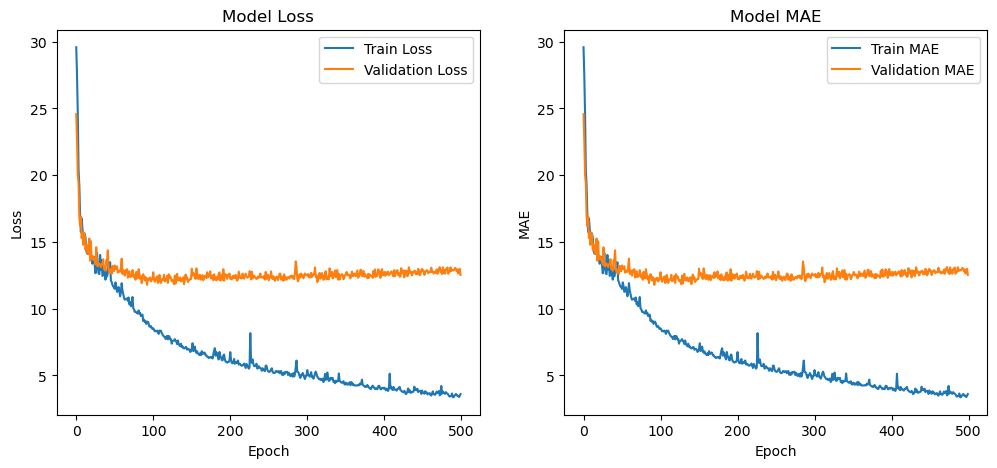

In [392]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.metrics import MeanAbsoluteError as MAE
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(123)
tf.random.set_seed(123)

# Determine input dimension
input_dim = X_train_clean.shape[1]

# Build the model
model = Sequential()
model.add(Dense(128, input_dim=input_dim, activation='relu'))  # First hidden layer
model.add(Dense(64, activation='relu'))  # Second hidden layer
model.add(Dense(32, activation='relu'))  # Third hidden layer
model.add(Dense(1))  # Output layer

# Compile the model with specified learning rate
model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanAbsoluteError(), metrics=[MAE()])

# Train the model with specified number of epochs
history = model.fit(X_train_clean, y_train, epochs=500, batch_size=64, validation_split=0.2, verbose=1)

# Make predictions on the training and test data
y_pred_train = model.predict(X_train_clean)
y_pred_test = model.predict(X_test_clean)

# Flatten the predictions
y_pred_train_flat = y_pred_train.flatten()
y_pred_test_flat = y_pred_test.flatten()

# Calculate Mean Absolute Error (MAE) for the training and test data
mae_train_dl = np.mean(np.abs(y_train - y_pred_train_flat))
mae_test_dl = np.mean(np.abs(y_test - y_pred_test_flat))

# Print the MAE results
print(f"MAE Train : {mae_train_dl:.4f}")
print(f"MAE Test  : {mae_test_dl:.4f}")

# Visualize model performance over epochs
# Plot loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [393]:
# Define MAE values for training and test sets from the models created
mae_train = [
    mae_train_baseline, mae_train_lg, mae_train_dt, mae_train_dt_cv, 
    mae_train_rf, mae_train_rf_cv, mae_train_ab, mae_train_ab_cv, 
    mae_train_gb, mae_train_gb_cv, mae_train_xgb, mae_train_xgb_random_cv, 
    mae_train_lgb, mae_train_lgb_cv, mae_train_dl
]

mae_test = [
    mae_test_baseline, mae_test_lg, mae_test_dt, mae_test_dt_cv, 
    mae_test_rf, mae_test_rf_cv, mae_test_ab, mae_test_ab_cv, 
    mae_test_gb, mae_test_gb_cv, mae_test_xgb, mae_test_xgb_random_cv, 
    mae_test_lgb, mae_test_lgb_cv, mae_test_dl
]

# Define indexes for the summary DataFrame
indexes = [
    'baseline', 'linear regression', 'Decision Tree', 'Decision Tree CV', 
    'Random Forest', 'Random Forest CV', 'AdaBoost', 'AdaBoost CV', 
    'Gradient Boosting', 'Gradient Boosting CV', 'XGBoost', 'XGBoost CV', 
    'LightGBM', 'LightGBM CV', 'Simple Neural Network'
]

# Create a summary DataFrame with MAE values for training and test sets
summary_df = pd.DataFrame({
    "MAE Train": mae_train,
    "MAE Test": mae_test
}, index=indexes)

# Display the summary DataFrame
summary_df


,MAE Train,MAE Test
baseline,17.121149,17.298073
linear regression,14.437037,16.881258
Decision Tree,6.429603,14.193112
Decision Tree CV,9.036316,13.992735
Random Forest,7.551993,12.178658
Random Forest CV,7.984914,12.158847
AdaBoost,20.028720,20.012340
AdaBoost CV,13.811285,15.026827
Gradient Boosting,9.389972,12.517468
Gradient Boosting CV,0.584430,11.426269


In [394]:
# Sorted by MAE Test (Ascending)
summary_df.sort_values(by='MAE Test')

,MAE Train,MAE Test
XGBoost CV,0.942025,10.945612
LightGBM,4.064312,11.246814
LightGBM CV,3.584750,11.320557
Gradient Boosting CV,0.584430,11.426269
XGBoost,1.001011,11.434306
Random Forest CV,7.984914,12.158847
Random Forest,7.551993,12.178658
Gradient Boosting,9.389972,12.517468
Simple Neural Network,5.167243,12.900900
Decision Tree CV,9.036316,13.992735


## Error Analysis

In [395]:
y_pred_test_xgboost_cv = best_xgb.predict(X_test_clean)

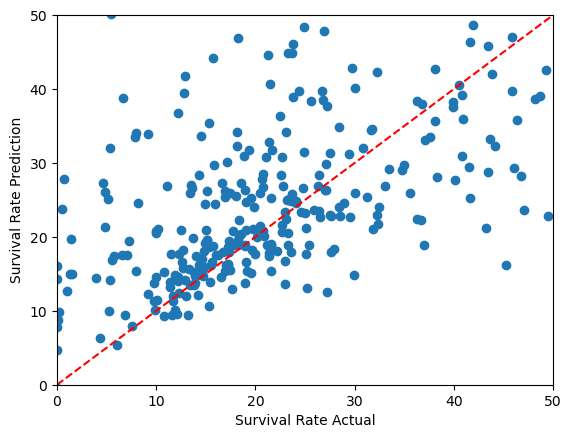

In [396]:
#Scatter plot data faktual dan data prediksi
plt.scatter(y_test, y_pred_test_xgboost_cv)
plt.plot([0, 100], [0,100], "--r")

plt.xlabel("Survival Rate Actual")
plt.ylabel("Survival Rate Prediction")
plt.xlim(0, 50)
plt.ylim(0, 50)
#plt.savefig("predict.png")
plt.show()

## Save Best Model

In [398]:
import pickle

# Define the file path where the model will be saved
xgboost_cv = 'model/best_model_xgb_survival_rate.pkl'

# Open the file in write-binary mode and save the best XGBoost model
with open(xgboost_cv, 'wb') as file:
    pickle.dump(best_xgb, file)

## Load Model

In [ ]:
import pickle

# Load the XGBoost model from the file
with open("model/best_model_xgb_survival_rate.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Use the loaded model to make predictions on the test data
y_pred_loaded_model = loaded_model.predict(X_test_clean)